# Facial Emotions Detection using Convolutional Neural Network(CNN)

# 1.Objectives

1. To apply Convolutional neural networks (CNN) for facial expression/emotions recognition.

2. To correctly classify each facial image into one of the seven facial emotion categories:
    **anger, disgust, fear, happiness, sadness, surprise, and neutral.**
    


# 2.Import Python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler

import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# 3. Load the dataset

In [ ]:
train_data_dir = pathlib.Path("../input/facial-expression-recognition-dataset/train")
test_data_dir = pathlib.Path("../input/facial-expression-recognition-dataset/test")

In [3]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        '../input/d/msambare/fer2013/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '../input/d/msambare/fer2013/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# 4.Build convolutional neural network

**CNN Architecture:**

    Conv -> Activation  
    Conv -> Activation 
    MaxPooling
    Dropout
    
    Conv -> Activation
    MaxPooling
    Conv -> Activation
    Dropout
    
    Flatten
    Dense ->  Activation
    Dropout
    Dense ->  Activation
    Output layer


In [4]:
def build_model(optim):
    # Initialize a Sequential model with the name 'DCNN'
    model = Sequential(name='DCNN')

    # Block 1: Convolutional Layer, Batch Normalization, Convolutional Layer, Batch Normalization
    model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(img_width, img_height, img_depth),
                     activation='elu', padding='same', kernel_initializer='he_normal', name='conv2d_1'))
    model.add(BatchNormalization(name='batchnorm_1'))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='elu', padding='same', kernel_initializer='he_normal',
                     name='conv2d_2'))
    model.add(BatchNormalization(name='batchnorm_2'))

    # Max Pooling Layer, Dropout Layer
    model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_1'))
    model.add(Dropout(0.4, name='dropout_1'))

    # Block 2: Convolutional Layer, Batch Normalization, Convolutional Layer, Batch Normalization
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same', kernel_initializer='he_normal',
                     name='conv2d_3'))
    model.add(BatchNormalization(name='batchnorm_3'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same', kernel_initializer='he_normal',
                     name='conv2d_4'))
    model.add(BatchNormalization(name='batchnorm_4'))

    # Max Pooling Layer, Dropout Layer
    model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_2'))
    model.add(Dropout(0.4, name='dropout_2'))

    # Block 3: Convolutional Layer, Batch Normalization, Convolutional Layer, Batch Normalization
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same', kernel_initializer='he_normal',
                     name='conv2d_5'))
    model.add(BatchNormalization(name='batchnorm_5'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same', kernel_initializer='he_normal',
                     name='conv2d_6'))
    model.add(BatchNormalization(name='batchnorm_6'))

    # Max Pooling Layer, Dropout Layer
    model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_3'))
    model.add(Dropout(0.5, name='dropout_3'))

    # Flatten Layer
    model.add(Flatten(name='flatten'))

    # Fully Connected Layer, Batch Normalization
    model.add(Dense(128, activation='elu', kernel_initializer='he_normal', name='dense_1'))
    model.add(BatchNormalization(name='batchnorm_7'))

    # Dropout Layer, Output Layer
    model.add(Dropout(0.6, name='dropout_4'))
    model.add(Dense(num_classes, activation='softmax', name='out_layer'))

    # Compile the model with categorical crossentropy loss, optimizer, and evaluation metrics
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    # Display a summary of the model architecture
    model.summary()

    # Return the built model
    return model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
448/448 [==============================] - 202s 448ms/step - loss: 1.7472 - accuracy: 0.2884 - val_loss: 1.5688 - val_accuracy: 0.3958
Epoch 2/20
448/448 [==============================] - 181s 404ms/step - loss: 1.4470 - accuracy: 0.4411 - val_loss: 1.3208 - val_accuracy: 0.4927
Epoch 3/20
448/448 [==============================] - 182s 406ms/step - loss: 1.2845 - accuracy: 0.5079 - val_loss: 1.2030 - val_accuracy: 0.5374
Epoch 4/20
448/448 [==============================] - 183s 407ms/step - loss: 1.2078 - accuracy: 0.5414 - val_loss: 1.1626 - val_accuracy: 0.5597
Epoch 5/20
448/448 [==============================] - 180s 402ms/step - loss: 1.1470 - accuracy: 0.5636 - val_loss: 1.1283 - val_accuracy: 0.5746
Epoch 6/20
448/448 [==============================] - 182s 405ms/step - loss: 1.1084 - accuracy: 0.5773 - val_loss: 1.1006 - val_accuracy: 0.5844
Epoch 7/20
448/448 [==============================] - 182s 407ms/step - loss: 1.0618 - accuracy: 0.5964 - val_loss: 1.0893 -

# 5.Visualize Training Performance

In [5]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


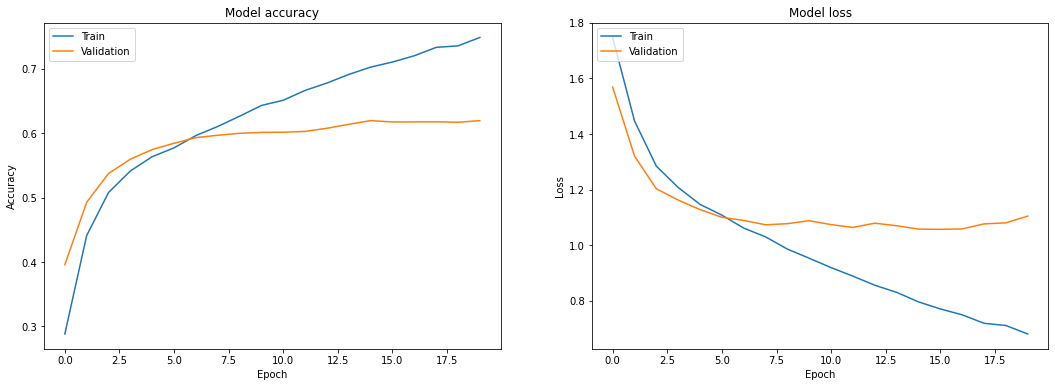

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(emotion_model_info.history['accuracy'])
axes[0].plot(emotion_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(emotion_model_info.history['loss'])
axes[1].plot(emotion_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 6.Saving the model

In [7]:
emotion_model.save('facial_emotions_model.h5')